**Introduction**

วิเคราะห์ข้อมูลการจองตั๋วเครื่องบินที่ได้มาจากเว็บไซต์ "Ease My Trip" โดย มีเป้าหมาย การทำนายราคาตั๋วเครื่องบิน

**Questions**

1. ราคาตั๋วเครื่องบินแตกต่างกันไปตามสายการบินหรือไม่?

2. ราคาตั๋วจะได้รับผลกระทบอย่างไรเมื่อซื้อตั๋วเพียง 1 หรือ 2 วันก่อนการเดินทาง?

3. ราคาตั๋วเปลี่ยนแปลงตามเวลาการออกเดินทางและเวลาถึงที่หมายหรือไม่?

4. ราคาตั๋วจะเปลี่ยนแปลงอย่างไรเมื่อแหล่งที่มาและปลายทางเปลี่ยนไป?

5. ราคาตั๋วแตกต่างกันอย่างไรระหว่างชั้นประหยัด(Economy)และชั้นธุรกิจ(Business)?

ข้อมูลถูกเก็บรวบรวมเป็นเวลา 50 วัน ตั้งแต่วันที่ 11 กุมภาพันธ์ ถึง 31 มีนาคม 2022

การเดินทางระหว่าง 6 เมืองใหญ่ในอินเดีย 

**คุณลักษณะ(featture)**  
1) **สายการบิน (Airline):** ชื่อสารการบิน
2) **เที่ยวบิน (Flight):**     รหัสเที่ยวบิน
3) **เมืองต้นทาง (Source City):** เมืองที่เครื่องบินออกเดินทาง 
4) **เวลาที่ออกเดินทาง (Departure Time):** เวลาออกเดินทางเป็น 6 ช่วง
5) **จำนวนหยุด (Stops):** จำนวนจุดหยุดพักระหว่างเมืองต้นทางและปลายทาง
6) **เวลาที่มาถึง (Arrival Time):** เวลาถึงที่หมายเป็น 6 ช่วง
7) **เมืองปลายทาง (Destination City):** เมืองที่เครื่องบินจะลงจอด 6 เมือง
8) **ชั้นโดยสาร (Class):** ชั้นธุรกิจ(Business)และชั้นประหยัด(Economy)
9) **ระยะเวลา (Duration):** เวลาการเดินทาง เป็น ชั่วโมง
10) **วันคงเหลือ (Days Left):** จำนวนวันที่จองตั๋วก่อนการเดินทาง
11) **ราคา (Price):** ราคาตั๋ว เป้าหมายที่จะทำนาย

Import Library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Data Exploration

In [2]:
df = pd.read_csv("Clean_Dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.info() #ดูโครงสร้างข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.isna().sum() #ตรวจสอบจำนวนค่าว่าง (NaN หรือ Null)

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

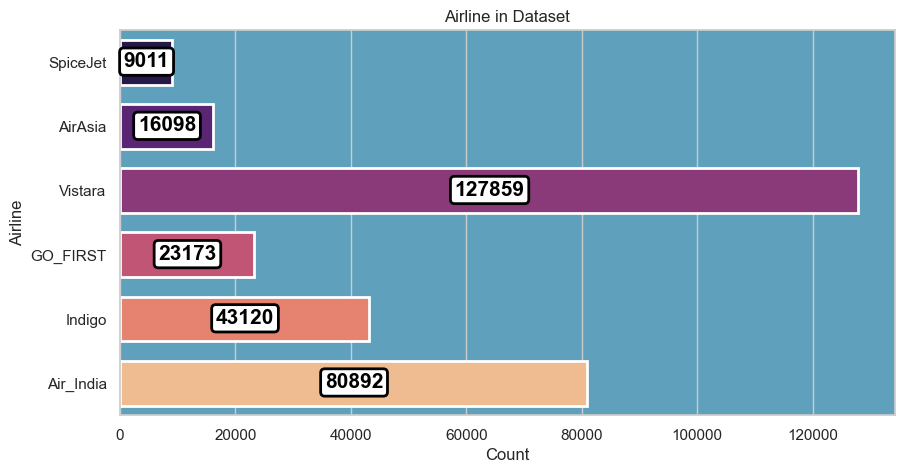

In [6]:
background_color = '#5fa1bc' #กำหนดสีพื้นหลัง (background_color) เป็น #5fa1bc ซึ่งเป็นสีฟ้าอ่อน
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color}) #ตั้งค่าธีมของกราฟเป็น whitegrid และกำหนดให้สีพื้นหลังของแกน (axes) เป็น background_color
plt.subplots(figsize=(10, 5)) #สร้างพื้นที่สำหรับกราฟขนาด 10x5 นิ้ว
p = sns.countplot(                            #สร้างกราฟแถบ (bar plot)และนับจำนวนข้อมูลในairline
                  y="airline",                # y คือ คอลัมป์
                  data=df,                    #ใช้ข้อมูลจากไหน
                  hue="airline",              #กำหนดให้แถบแสดงสีตามหมวดหมู่ airline
                  palette='magma',            #กำหนดชุดสี
                  edgecolor='white',          #สีขอบ
                  linewidth=2,                #ความหนาของเส้นขอบ
                  width=0.7,                  #ความกว้างของแถบให้เป็น 70% ของพื้นที่ที่สามารถใช้ได้ 
                  legend=False)               #ไม่ต้องการแสดงlegend

for container in p.containers: #ลูปให้ครบทุกตัวในbar
    plt.bar_label(container,   #เพิ่มข้อความให้แต่ละบาร์
                  label_type="center",  #กำหนดให้ป้ายอยู่ตรงกลาง
                  color="black", #ป้ายเป็นสีดำ
                  fontsize=15, #ให้อักษรมีขนาด 15
                  weight='bold', #อักษรเป็นตัวหนา
                  padding=6, #กำหนดช่องว่างระหว่างข้อความกับขอบของป้ายกำกับเป็น 6
                  position=(0.5, 0.5), #กำหนดตำแหน่งของป้ายกำกับให้อยู่กึ่งกลางแท่งกราฟในแนวตั้งและแนวนอน
                  bbox={                            #การตกแต่งกล่อง
                        "boxstyle": "round",        #ทำให้กล่องรอบป้ายกำกับมีมุมโค้งมน
                        "pad": 0.2                  #กำหนดระยะห่างระหว่างขอบของกล่องกับข้อความเป็น 0.2 หน่วย
                        , "facecolor": "white",     #ตั้งสีพื้นหลังของกล่องเป็นสีขาว
                        "edgecolor": "black",       #ตั้งสีขอบของกล่องเป็นสีดำ
                        "linewidth": 2,             #กำหนดความหนาของขอบกล่องเป็น 2 หน่วย
                        "alpha": 1})                #กำหนดความโปร่งแสงของกล่องเป็น 1 (ไม่โปร่งแสง)
plt.title("Airline in Dataset")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

จำนวนที่สายการบินให้บริการ

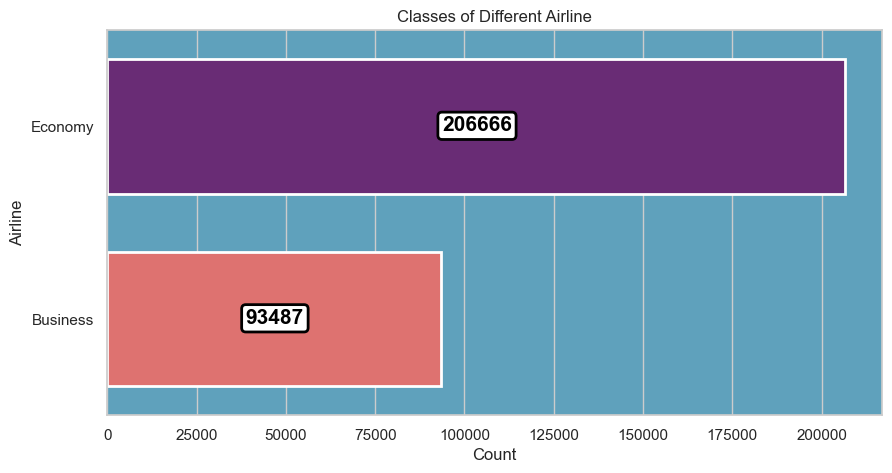

In [7]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="class",hue='class', data=df, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Classes of Different Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

มีการเลือก class ที่เป็นEconomy มากกว่า business อย่างเห็นได้ชัด

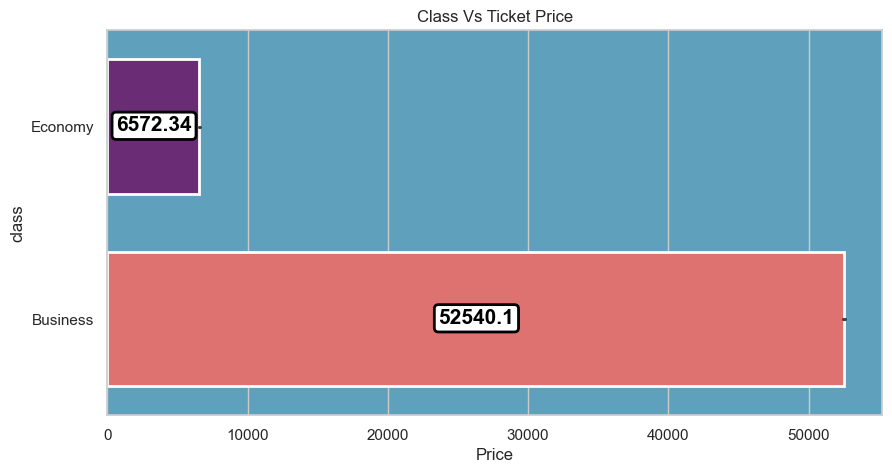

In [8]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.barplot(y="class",x= "price" ,hue='class',data=df, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Class Vs Ticket Price")
plt.xlabel("Price")
plt.ylabel("class")
plt.show()

ราคา Business สูงว่า Economy อย่างมาก

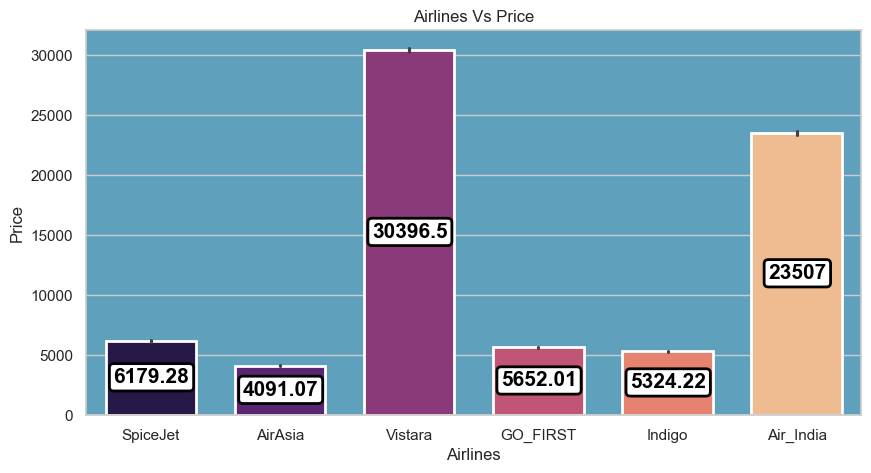

In [9]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.barplot(y="price",x="airline" , hue='airline',data=df, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Airlines Vs Price")
plt.xlabel("Airlines")
plt.ylabel("Price")
plt.show()

ราคาของสายการบินโดยเฉลี่ย

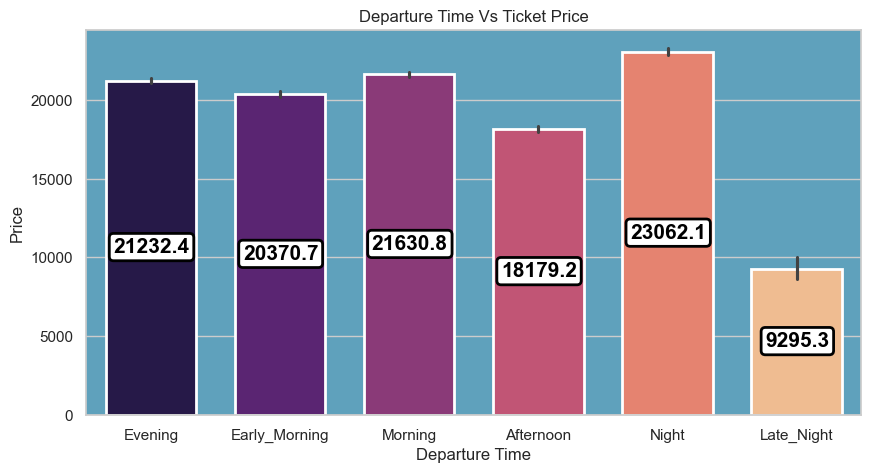

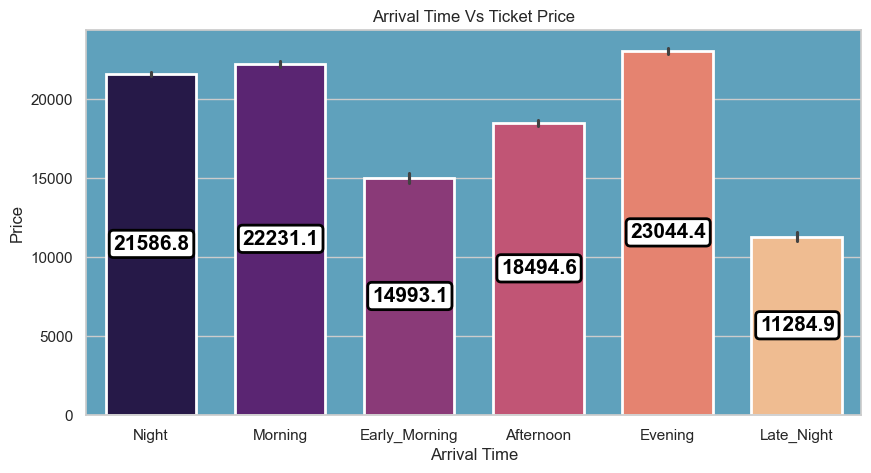

In [10]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.barplot(x="departure_time",y= "price" ,hue='departure_time',data=df, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Departure Time Vs Ticket Price")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.barplot(y="price",x= "arrival_time" ,hue='arrival_time',data=df, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
      plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Arrival Time Vs Ticket Price")
plt.xlabel("Arrival Time")
plt.ylabel("Price")
plt.show()

ราคาตั๋วเปลี่ยนแปลงตามเวลาออกเดินทางหรือไม่?
เวลาออกเดินทางและเวลาถึงที่หมายมีผลต่อราคาตั๋ว

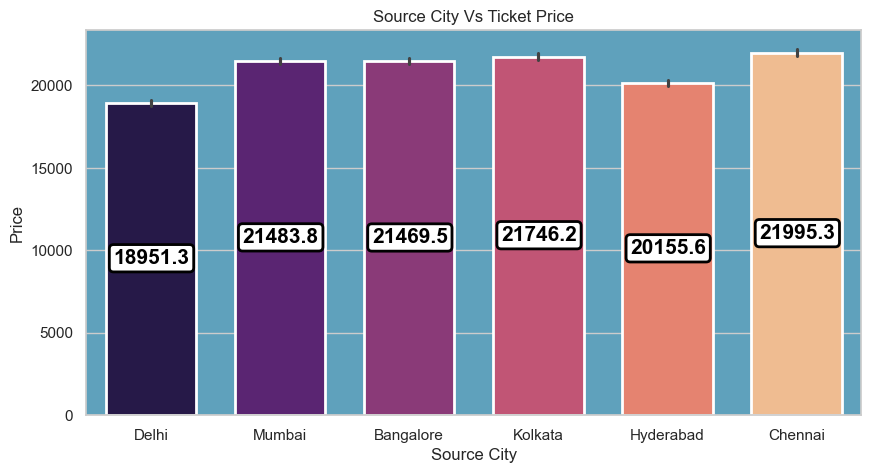

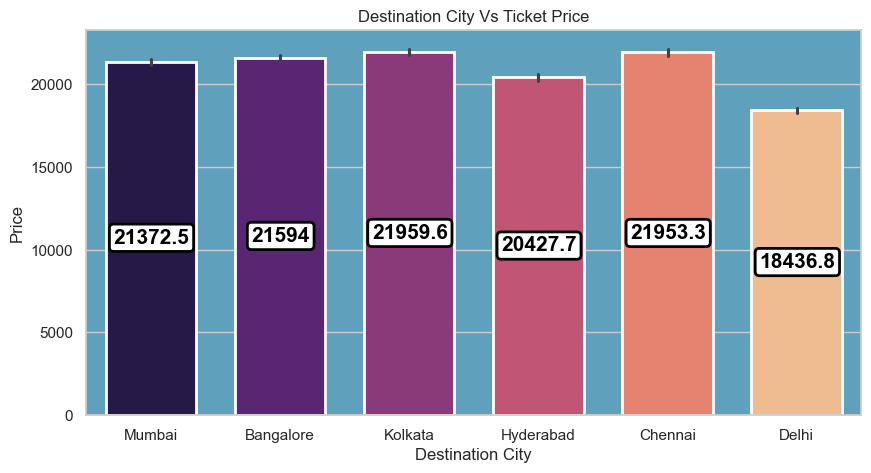

In [11]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.barplot(x="source_city",y= "price" ,data=df,hue='source_city', palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Source City Vs Ticket Price")
plt.xlabel("Source City")
plt.ylabel("Price")
plt.show()

background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.barplot(y="price",x= "destination_city" ,data=df, hue='destination_city',palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Destination City Vs Ticket Price")
plt.xlabel("Destination City")
plt.ylabel("Price")
plt.show()

ราคาของเมืองต้นทางไปปลายทางมีผลไหม?
เมืองต้นทางปลายทางมีผลต่อราคา

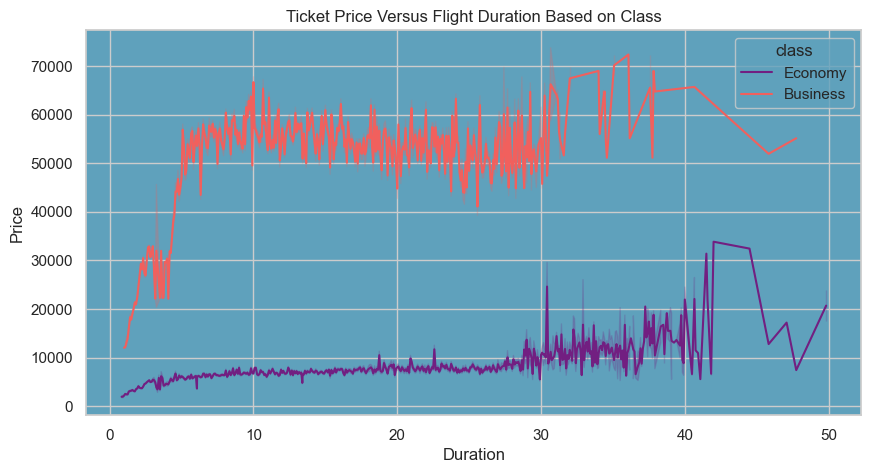

In [12]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df,x='duration',y='price',hue='class',palette='magma')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Ticket Price Versus Flight Duration Based on Class")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

เมื่อการเดินทางใช้เวลาที่ยาวนาน ราคาก็จะสูงขึ้นตามไปด้วย

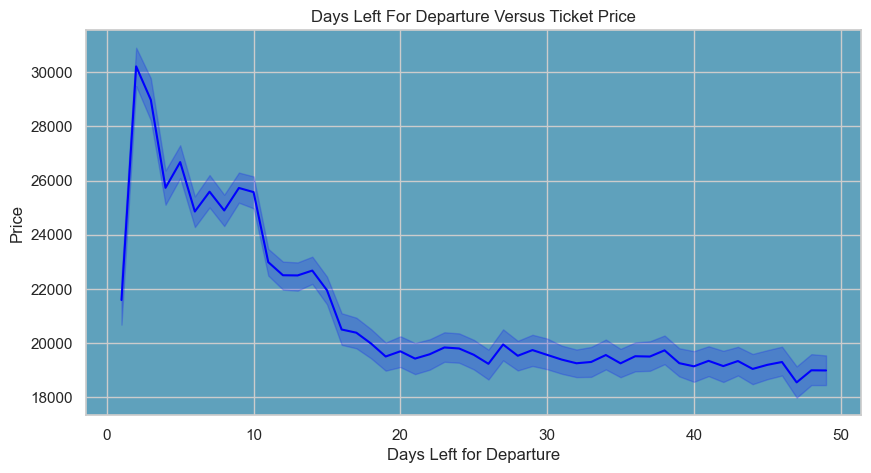

In [13]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df,x='days_left',y='price',color='blue')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Days Left For Departure Versus Ticket Price")
plt.xlabel("Days Left for Departure")
plt.ylabel("Price")
plt.show()

ราคาตั๋วจะได้รับผลกระทบอย่างไรเมื่อซื้อตั๋วเพียง 1 หรือ 2 วันก่อนการเดินทาง ?
ราคาตั๋วจะสูงขึ้นเรื่อยๆเมื่อใกล้ถึงวันเดินทาง โดยราคาจะสูงขึ้นมากเป็นพิเศษที่ 2-3 วันก่อนการเดินทาง 

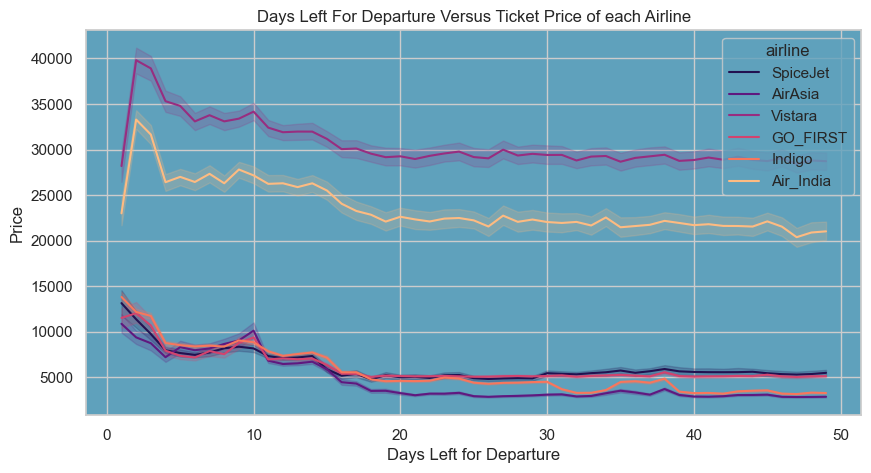

In [14]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='magma')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Days Left For Departure Versus Ticket Price of each Airline")
plt.xlabel("Days Left for Departure")
plt.ylabel("Price")
plt.show()

ราคาแต่ละสายการบินก่อนการเดินทาง

In [15]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head()

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175


จำนวนเที่ยวบินจากเมืองหนึ่งไปอีกเมืองหนึ่ง

In [16]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


ค่าเฉลี่ยของราคาตั๋วจากเมืองหนึ่งไปอีกเมืองหนึ่ง

Preprocessing

In [17]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [18]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

#เข้ารหัสข้อมูล
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0) 

In [19]:
df.stops = pd.factorize(df.stops)[0] #แทนที่ข้อมูลตัวเลข [0]นำตัวที่แทนมาใช้  

In [20]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [21]:
#ทำ One-Hot Encoding เพื่อแปลงคอลัมน์ที่มีข้อมูลแบบหมวดหมู่ ให้เป็นคอลัมน์ตัวเลขแบบ 0 หรือ 1 เพื่อให้สามารถนำไปใช้งานในโมเดล
df = df.join(pd.get_dummies(df.airline,prefix='airline')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city,prefix='source')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city,prefix='dest')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.arrival_time,prefix='arrival')).drop('arrival_time',axis=1)
df = df.join(pd.get_dummies(df.departure_time,prefix='departure')).drop('departure_time',axis=1)
#30 col ใหม่ drop 5 จากเดิม 10 
# รวมกัน เดิม 10-drop 5 +ใหม่ 30 = 35 col

In [22]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


Training Regression Model

In [28]:
#แบ่งชุดข้อมูล
X, y = df.drop('price',axis=1), df.price 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [29]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [30]:
y_pred = reg.predict(X_test)

print('R2: ',r2_score(y_test,y_pred)) #ดูความแม่นยำของโมเดลในรูปแบบของ R-squared ยิ่งใกล้ 1 ยิ่งด่ี 
#จะรู้ได้ไงว่าอันไหนถึงน้อย
print('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred))) #ค่านี้เป็นการวัดที่นิยมใช้เพราะบ่งบอกถึงความผิดพลาดเฉลี่ยในหน่วยเดียวกับข้อมูลจริง



R2:  0.9853055091482792
RMSE:  2739.44198144921


In [27]:
deg = DecisionTreeRegressor()
deg.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
y_pred_deg = deg.predict(X_test)

print('R2: ',r2_score(y_test,y_pred_deg)) #ดูความแม่นยำของโมเดลในรูปแบบของ R-squared ยิ่งใกล้ 1 ยิ่งด่ี 
#จะรู้ได้ไงว่าอันไหนถึงน้อย
print('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred_deg))) #ค่านี้เป็นการวัดที่นิยมใช้เพราะบ่งบอกถึงความผิดพลาดเฉลี่ยในหน่วยเดียวกับข้อมูลจริง

R2:  0.9949014339080919
RMSE:  1613.6482162114107


C:\Users\User\AppData\Local\Temp\ipykernel_22232\837428219.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_values, ax=ax[0], palette="magma")
C:\Users\User\AppData\Local\Temp\ipykernel_22232\837428219.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rmse_values, ax=ax[1], palette="magma")


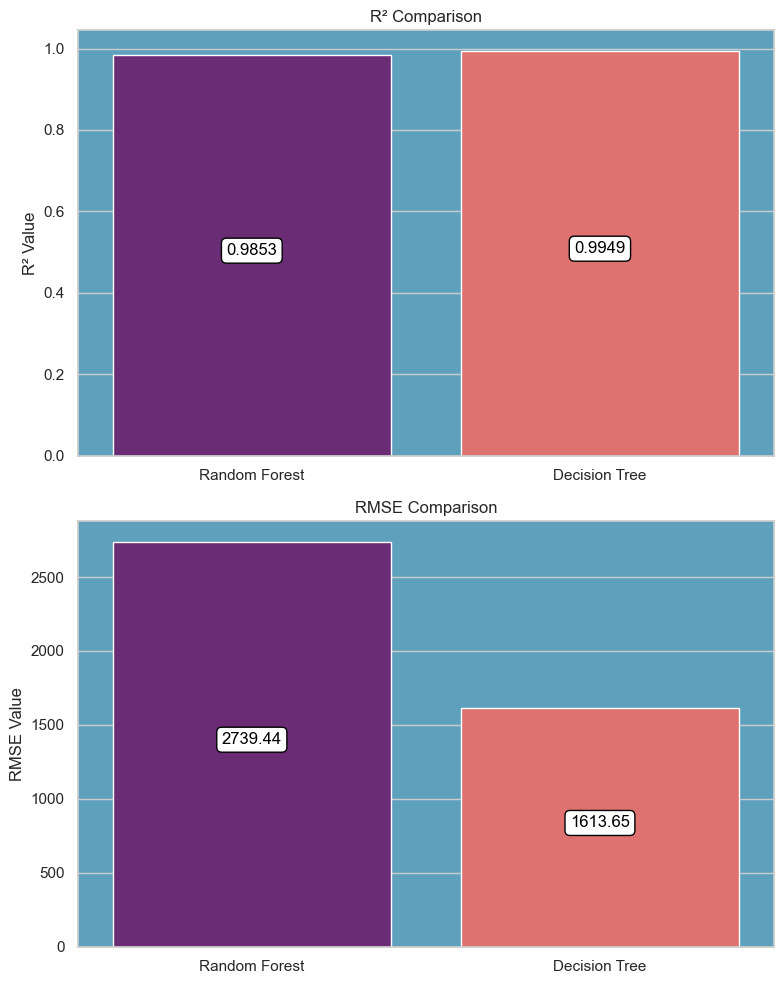

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# คำนวณค่า R²
r2_reg = r2_score(y_test, y_pred)
r2_deg = r2_score(y_test, y_pred_deg)

# คำนวณค่า RMSE
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_deg = np.sqrt(mean_squared_error(y_test, y_pred_deg))

# สร้างกราฟ
labels = ['Random Forest', 'Decision Tree']
r2_values = [r2_reg, r2_deg]
rmse_values = [rmse_reg, rmse_deg]

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# กราฟ R²
sns.barplot(x=labels, y=r2_values, ax=ax[0], palette="magma")
ax[0].set_title('R² Comparison')
ax[0].set_ylabel('R² Value')

# เพิ่ม label บนแท่งกราฟ R² และสร้างกล่องสี่เหลี่ยมรอบข้อความ
for i, value in enumerate(r2_values):
    ax[0].text(i, value / 2, f'{value:.4f}', ha='center', fontsize=12, color='black',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# กราฟ RMSE
sns.barplot(x=labels, y=rmse_values, ax=ax[1], palette="magma")
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE Value')

# เพิ่ม label บนแท่งกราฟ RMSE และสร้างกล่องสี่เหลี่ยมรอบข้อความ
for i, value in enumerate(rmse_values):
    ax[1].text(i, value / 2, f'{value:.2f}', ha='center', fontsize=12, color='black',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()
